# Question 1.2 PCA

In [1]:
import sys
print(sys.version)

3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import time

import pandas as pd
import seaborn as sns

In [3]:
! pwd

/Users/janet/Machine_Learning_CSE_546/HW4/notebooks


In [4]:
! ls ../../HW3/code/

__pycache__                          least_squares_sgd.py
classification_base.py               logistic_regression.py
hyperparameter_explorer.py           mnist_helpers.py
hyperparameter_explorer_semi-orig.py not_updated
k_means.py                           pca.py
kernel.py


In [5]:
import sys
sys.path.append('../../HW3/code/')

In [6]:
from pca import Pca, plot_fractional_reconstruction_error

In [7]:
from classification_base import MNIST_PATH
from mnist_helpers import mnist_training, mnist_testing

In [8]:
train_X, train_y = mnist_training(shuffled=False)
#test_X, test_y = mnist_testing(shuffled=True)

## PCA MNIST data

In [9]:
X_num = train_X.shape[0]
train = Pca(train_X, dimensions=50, y=train_y, center=False)

In [10]:
train.calc_eigen_stuff()

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [11]:
train.eigenvals[0:10]

array([ 2476871.87792173,   285468.25323556,   243256.98911909,
         209751.69652609,   181172.2224198 ,   148084.56338301,
         124745.98943206,    99889.15588382,    98709.32708764,
          81022.15396414])

In [12]:
train.sigma

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [13]:
train.sum_of_top_eigenvalues()

5108096.3418362727

In [14]:
! ls '../figures'

Q-1-2-2_0_to_50.pdf        Q-2-1_weight_visualization
Q-1-2-2_2_to_50.pdf


In [15]:
train.fractional_reconstruction_error()

In [16]:
train.fractional_reconstruction_df.head(2)

,fractional reconstruction,k
0,0.566210,1
0,0.516215,2


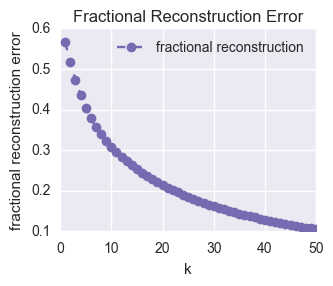

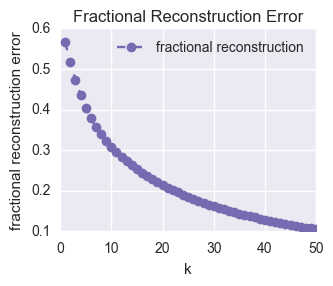

In [17]:
plot_fractional_reconstruction_error(train, start=0, stop=50, 
                                     title ='Fractional Reconstruction Error')

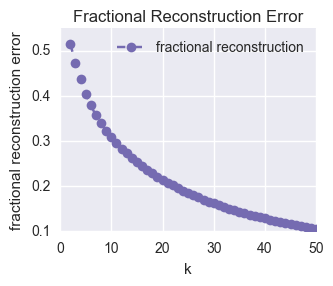

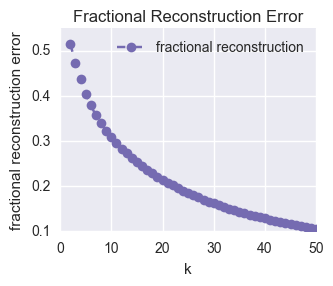

In [18]:
plot_fractional_reconstruction_error(train, start=2, stop=50, 
                                     title ='Fractional Reconstruction Error')

In [19]:
len(train.eigenvals[0:50])

50

In [20]:
np.sum(train.eigenvals[0:50])

5108096.3418362727

In [21]:
np.round(train.eigenvals.copy(),1)[0:50]

array([ 2476871.9,   285468.3,   243257. ,   209751.7,   181172.2,
         148084.6,   124746. ,    99889.2,    98709.3,    81022.2,
          72880.3,    70324.1,    58836.2,    58486.5,    54547.7,
          51070.4,    46834.4,    44423.4,    40782. ,    39522.8,
          36556.4,    34523.6,    32726.1,    31359.9,    30316.6,
          28799.5,    27920.1,    26962.9,    25534.3,    23690.4,
          22575. ,    22228.6,    20672.4,    20249.7,    19546.9,
          18661.9,    17341.1,    16726.5,    16507. ,    16205.2,
          15678.8,    15254.2,    14407.1,    13655.3,    13216.7,
          12864. ,    12414.6,    12060.1,    11684.5,    11076.8])

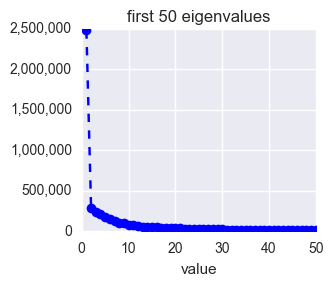

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(3.5,3))
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plot_x = range(1, 51)
plot_y = np.round(train.eigenvals.copy(),1)[0:50]
#plot_data = pd.DataFrame({'eigenvalue':np.round(train.eigenvals.copy(),1)[0:50], 
#              'number': range(1,50+1)}).plot.scatter(x='number', y='eigenvalue')
plt.plot(plot_x, plot_y, linestyle='--', marker='o', color='b')
plt.title('first 50 eigenvalues')
plt.xlabel('eigenvalue')
plt.xlabel('value')
plt.tight_layout()
#fig.savefig('../figures/Q-1-2-1_first_50_eigenvalues.pdf')


In [23]:
np.save("../data/Q-0_PCA_eigenvalues_uncentered.npy", train.eigenvals)

In [24]:
np.save("../data/Q-0_PCA_eigenvectors_uncentered.npy", train.eigenvects)

In [25]:
train.eigenvects.shape

(784, 784)

In [26]:
train

In [27]:
import pickle
pickle.dump(obj=train, file=open('../data/PCA_training_data_uncentered.pickle', "wb"))

In [28]:
! ls -l ../data/*.pickle

-rw-r--r--  1 janet  staff  386247310 Nov 21 07:51 ../data/PCA_training_data.pickle
-rw-r--r--  1 janet  staff  386247310 Dec  5 07:22 ../data/PCA_training_data_uncentered.pickle


## Save transformed version of the train and test data

### Train

In [29]:
X_transformed_50 = train.transform_all_digits_down(n_components = 50)

In [30]:
X_transformed_50.shape

(60000, 50)

In [31]:
np.save('../data/X_transformed_by_50_components_uncentered.npy', X_transformed_50)

### Test

In [32]:
X_test, y_test = mnist_testing(shuffled=False)

In [33]:
assert X_test.shape[0] == y_test.shape[0]

In [34]:
X_test.shape

(10000, 784)

In [35]:
train.X = X_test

In [36]:
train.X.shape

(10000, 784)

In [37]:
X_test_transformed_50 = train.transform_all_digits_down(n_components = 50)

In [38]:
X_test_transformed_50.shape

(10000, 50)

In [39]:
np.save('../data/X_test_transformed_by_50_components_uncentered.npy', X_test_transformed_50)